# Практическое задание

# KNN и линейная регрессия

# Задание 1.

Сгенерировать случайным образом 3 набора данных. Количество точекв каждомот 100 до 200. Цветом обозначены метки классов. 
Для каждого набора данных:
1. Разделить датасет на train/test (80/20)
2. Обучить и протестировать KNN
3. Построить графики точности классификации (на train/test выборках) при разных k(1...8)
4. Пользуясь стандартными методами из scikit-lear nвычислить точность, полноту и F1-меру, построить матрицу расхождений

In [191]:
import numpy as np
import matplotlib.pyplot as plt
from sortedcontainers import SortedList

In [344]:
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs

### 1 набор данных

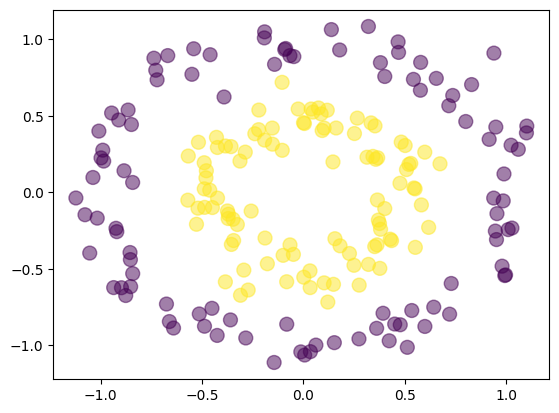

In [346]:
X1, y1 = make_circles(n_samples=200, noise=0.1, factor=0.5)
plt.scatter(X1[:, 0], X1[:, 1], s=100, c=y1, alpha=0.5)
plt.show()

In [347]:
# тестовое множество 1
X1_test = X1[160:]
y1_test = y1[160:]

# обучающее множество 1
X1_train = X1[:160] 
y1_train = y1[:160] 

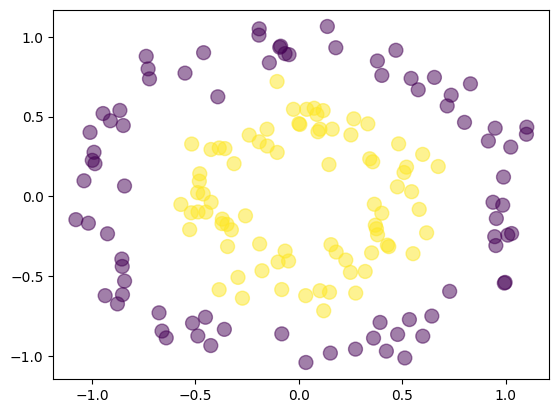

In [348]:
plt.scatter(X1_train[:,0], X1_train[:,1], s=100, c=y1_train, alpha=0.5)
plt.show()

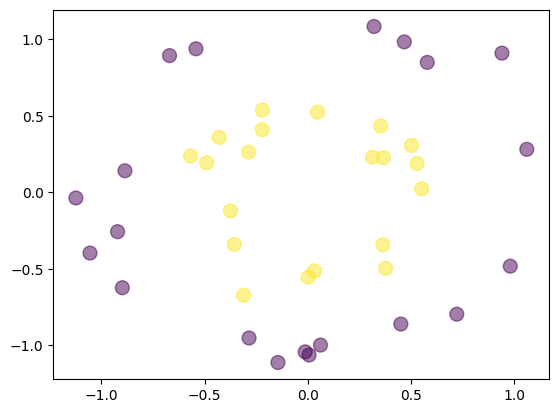

In [349]:
plt.scatter(X1_test[:,0], X1_test[:,1], s=100, c=y1_test, alpha=0.5)
plt.show()

### 2 набор данных

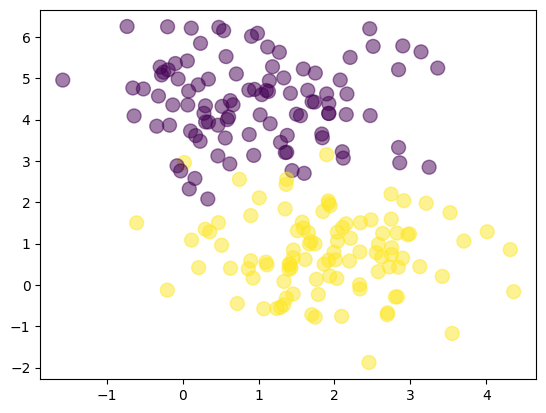

In [531]:
X2, y2 = make_blobs(n_samples=200, centers=2, n_features=2, random_state=0)
plt.scatter(X2[:,0], X2[:,1], s=100, c=y2, alpha=0.5)
plt.show()

In [532]:
# тестовое множество 2
X2_test = X2[80:]
y2_test = y2[80:]

# обучающее множество 2
X2_train = X2[:80] 
y2_train = y2[:80] 

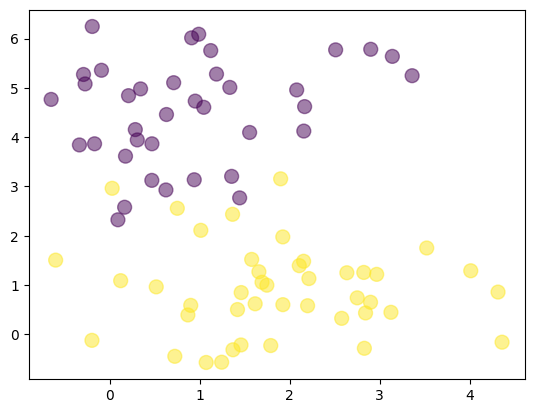

In [533]:
plt.scatter(X2_train[:,0], X2_train[:,1], s=100, c=y2_train, alpha=0.5)
plt.show()

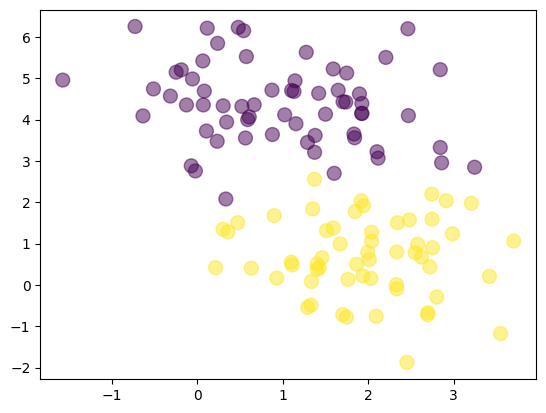

In [534]:
plt.scatter(X2_test[:,0], X2_test[:,1], s=100, c=y2_test, alpha=0.5)
plt.show()

### 3 набор данных

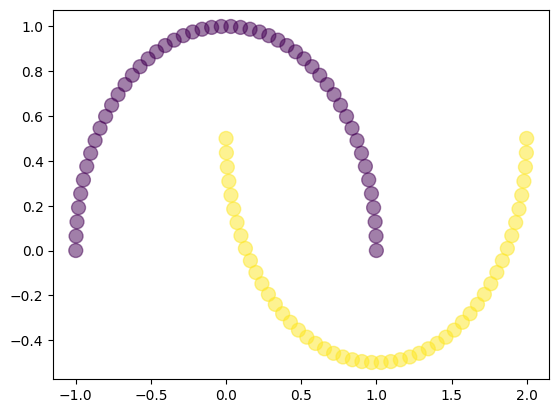

In [354]:
from sklearn.datasets import make_moons

X3, y3 = make_moons(n_samples=100, random_state=42)
plt.scatter(X3[:,0], X3[:,1], s=100, c=y3, alpha=0.5)
plt.show()

In [355]:
# тестовое множество 3
X3_test = X3[80:]
y3_test = y3[80:]

# обучающее множество 3
X3_train = X3[:80] 
y3_train = y3[:80]

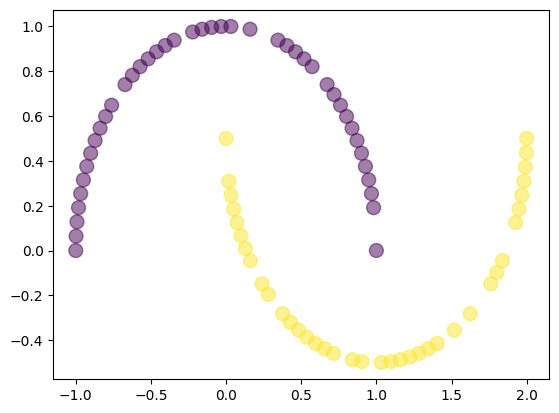

In [356]:
plt.scatter(X3_train[:,0], X3_train[:,1], s=100, c=y3_train, alpha=0.5)
plt.show()

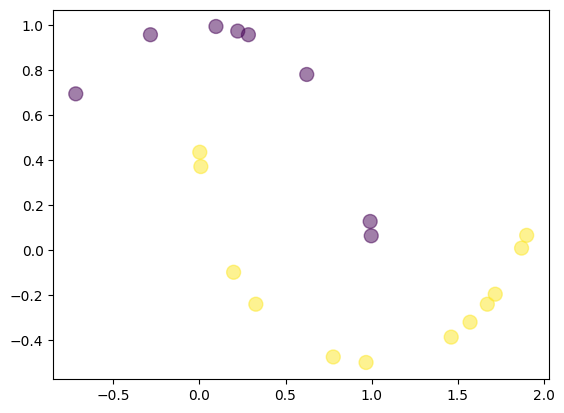

In [357]:
plt.scatter(X3_test[:,0], X3_test[:,1], s=100, c=y3_test, alpha=0.5)
plt.show()

### KNN - классификатор

In [535]:
class KNN(object):
    
    def __init__(self, k):
        self.k = k
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        
        
    def predict(self, XT):
        y = np.zeros(len(XT))
        
        for i, x in enumerate(XT):
            sl = SortedList()
            
            for j, x_train in enumerate(self.X):
                diff = x - x_train
                dist = diff.dot(diff)
                if (len(sl) < self.k):
                    sl.add( (dist, self.y[j]) )
                else:
                    if (dist < sl[-1][0]):
                        del sl[-1]
                        sl.add( (dist, self.y[j]) )
        
            votes = {}
            for _, v in sl:
                votes[v] = votes.get(v,0) + 1
        
            
            max_votes = 0
            max_votes_class = -1
            
            for v, count in votes.items():
                if count > max_votes:
                    max_votes = count
                    max_votes_class = v
                    
            y[i] = max_votes_class
        
        return y
        
        
    def score(self, testX, testY):
        return np.mean(self.predict(testX) == testY)*100

In [374]:
knn_cls = KNN(1)

In [375]:
# обучение 1 выборки
knn_cls.fit(X1_train, y1_train)

In [376]:
# предсказания на 1 тестовой выборке
y1_pred = knn_cls.predict(X1_test)
y1_pred

array([1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0.])

In [377]:
pip install mlxtend  

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: mlxtend in c:\users\sofja\appdata\local\programs\python\python311\lib\site-packages (0.21.0)




[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


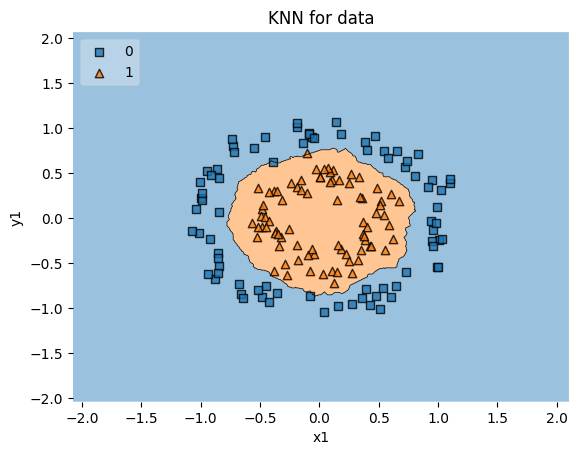

In [383]:
from mlxtend.plotting import plot_decision_regions

# k = 1
plot_decision_regions(X1_train, y1_train, clf=knn_cls, legend=2)

plt.xlabel('x1')
plt.ylabel('y1')
plt.title('KNN for data')
plt.show()

In [395]:
knn_cls = KNN(8)
knn_cls.fit(X1_train, y1_train)
y1_pred = knn_cls.predict(X1_test)
y1_pred

array([1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0.])

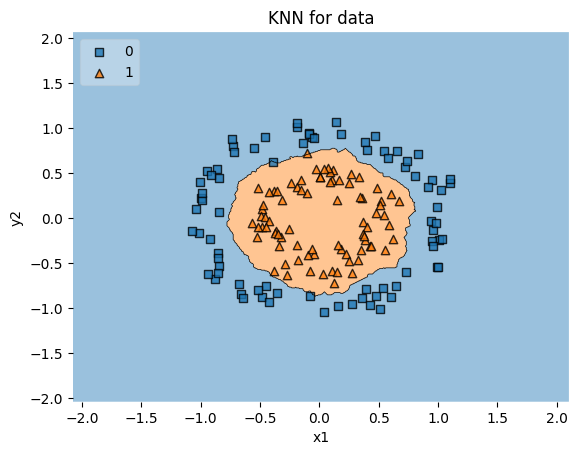

In [398]:
# k = 8
plot_decision_regions(X1_train, y1_train, clf=knn_cls, legend=2)

plt.xlabel('x1')
plt.ylabel('y2')
plt.title('KNN for data')
plt.show()

In [399]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [400]:
# точность, полнота, F1-мера для 1 выборки
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [394]:
# матрица расхождений для 1 выборки
print(confusion_matrix(y1_test, y1_pred))

[[20  0]
 [ 0 20]]


In [536]:
knn_cls = KNN(6)

In [537]:
# обучение 2 выборки
knn_cls.fit(X2_train, y2_train)

In [538]:
# предсказания на 2 тестовой выборке
y2_pred = knn_cls.predict(X2_test)
y2_pred

array([0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       0.])

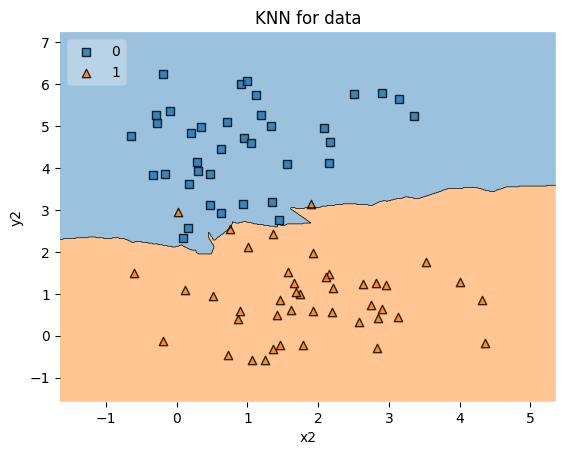

In [539]:
# k = 6
plot_decision_regions(X2_train, y2_train, clf=knn_cls, legend=2)

plt.xlabel('x2')
plt.ylabel('y2')
plt.title('KNN for data')
plt.show()

In [540]:
# точность, полнота, F1-мера для 2 выборки
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        63
           1       0.95      1.00      0.97        57

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



In [541]:
# матрица расхождений для 2 выборки
print(confusion_matrix(y2_test, y2_pred))

[[60  3]
 [ 0 57]]


In [548]:
knn_cls = KNN(2)

In [549]:
# обучение 3 выборки
knn_cls.fit(X3_train, y3_train)

In [550]:
# предсказания на 3 тестовой выборке
y3_pred = knn_cls.predict(X3_test)
y3_pred

array([1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 1.])

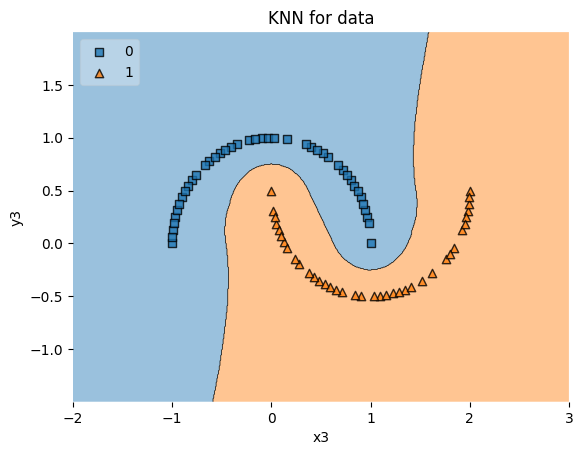

In [551]:
# k = 2
plot_decision_regions(X3_train, y3_train, clf=knn_cls, legend=2)

plt.xlabel('x3')
plt.ylabel('y3')
plt.title('KNN for data')
plt.show()

In [552]:
print(classification_report(y3_test, y3_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [553]:
# матрица расхождений для 3 выборки
print(confusion_matrix(y3_test, y3_pred))

[[ 8  0]
 [ 0 12]]


# Задание 2 
## Метрики

25 объектов классифицированы на 3 класса 

C="Cat"

F="Fish"

H="Hen"

истинные значения y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H]

результат системы y_pred = [C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H]

In [754]:
y_true = np.array(['C','C','C','C','C','C', 'F','F','F','F','F','F','F','F','F','F', 'H','H','H','H','H','H','H','H','H'])
y_pred = np.array(['C','C','C','C','H','F', 'C','C','C','C','C','C','H','H','F','F', 'C','C','C','H','H','H','H','H','H'])

In [768]:
y_actual = pd.Series([0, 0, 0, 0, 0, 0,  1, 1, 1, 1, 1, 1, 1, 1, 1, 1,  2, 2, 2, 2, 2, 2, 2, 2, 2], name='Actual')
y_predicted = pd.Series([0, 0, 0, 0, 2, 1,  0, 0, 0, 0, 0, 0, 2, 2, 1, 1,  0, 0, 0, 2, 2, 2, 2, 2, 2], name='Predicted')
confusion_matrix = pd.crosstab(y_actual, y_predicted, rownames=['Actual'], colnames=['Predicted'], margins=True)
confusion_matrix

Predicted,0,1,2,All
Actual,,,,
0,4,1,1,6
1,6,2,2,10
2,3,0,6,9
All,13,3,9,25


In [780]:
# CAT
cat_TP = 4
cat_FP = 9
cat_FN = 2

In [781]:
cat_precision = cat_TP / (cat_TP + cat_FP)
cat_precision

0.3076923076923077

In [782]:
cat_recall = cat_TP / (cat_TP + cat_FN)
cat_recall

0.6666666666666666

In [783]:
cat_F1_score = 2*cat_precision*cat_recall / (cat_precision + cat_recall)
cat_F1_score

0.42105263157894735

In [772]:
# FISH
fish_TP = 2
fish_FP = 1
fish_FN = 8

In [773]:
fish_precision = fish_TP / (fish_TP + fish_FP)
fish_precision

0.6666666666666666

In [774]:
fish_recall = fish_TP / (fish_TP + fish_FN)
fish_recall

0.2

In [784]:
fish_F1_score = 2*fish_precision*fish_recall / (fish_precision + fish_recall)
fish_F1_score

0.30769230769230765

In [776]:
# HEN
hen_TP = 6
hen_FP = 3
hen_FN = 3

In [777]:
hen_precision = hen_TP / (hen_TP + hen_FP)
hen_precision

0.6666666666666666

In [778]:
hen_recall = hen_TP / (hen_TP + hen_FN)
hen_recall

0.6666666666666666

In [785]:
hen_F1_score = 2*hen_precision*hen_recall / (hen_precision + hen_recall)
hen_F1_score

0.6666666666666666

TP = cat_TP + fish_TP + hen_TP
FP = cat_FP + fish_FP + hen_FP
FN = cat_FN + fish_FN + hen_FN
#### Macro Average

In [788]:
macro_average_precision  = (cat_precision + fish_precision + hen_precision) / 3
macro_average_precision

0.547008547008547

In [789]:
macro_average_recall  = (cat_recall + fish_recall + hen_recall) / 3
macro_average_recall

0.5111111111111111

In [790]:
macro_average_F1_score = (cat_F1_score + fish_F1_score + hen_F1_score) / 3
macro_average_F1_score

0.46513720197930725

#### Weighted Average

In [800]:
WA_precision_WA = (cat_precision*6 + fish_precision*10 + hen_precision*9) / 25
WA_precision_WA

0.5805128205128205

In [801]:
WA_recall = (cat_recall*6 + fish_recall*10 + hen_recall*9) / 25
WA_recall

0.48

In [802]:
WA_F1 = (cat_F1_score*6 + fish_F1_score*10 + hen_F1_score*9) / 25
WA_F1

0.46412955465587047

In [791]:
# проверка с помощью библиотеки sklearn.metrics
from sklearn.metrics import precision_recall_fscore_support

In [756]:
target_names = ['Cat', 'Fish', 'Hen']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Cat       0.31      0.67      0.42         6
        Fish       0.67      0.20      0.31        10
         Hen       0.67      0.67      0.67         9

    accuracy                           0.48        25
   macro avg       0.55      0.51      0.47        25
weighted avg       0.58      0.48      0.46        25



# Задание 3
## Линейная регрессия

In [473]:
import pandas as pd

In [514]:
file = ('CAR DETAILS FROM CAR DEKHO.csv')
dataFrame = pd.read_csv(file)
display(dataFrame)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


### Построение линейной регрессии 1

In [515]:
dataFrame['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [516]:
dataFrame['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [517]:
transmission_code = {'Manual': '0', 'Automatic': '1'}
dataFrame['transmission_code'] = dataFrame['transmission'].map(transmission_code)

fuel_code = {'Petrol': '0', 'Diesel': '1', 'CNG': '2', 'LPG': '3', 'Electric': '4'}
dataFrame['fuel_code'] = dataFrame['fuel'].map(fuel_code)

display(dataFrame)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,transmission_code,fuel_code
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,0,1
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,0,1
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,0,1
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,0,1
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,0,0
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,0,1


In [518]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [578]:
data_X = dataFrame[['selling_price','km_driven', 'year', 'transmission_code', 'fuel_code']]

scaler = MinMaxScaler()
scaler.fit(data_X)
scaled_features = scaler.transform(data_X)

X = pd.DataFrame(data = scaled_features, columns = ["selling_price","km_driven", "year","transmission","fuel"])

display(X)

,selling_price,km_driven,year,transmission,fuel
0,0.004505,0.086783,0.535714,0.0,0.00
1,0.012950,0.061988,0.535714,0.0,0.00
2,0.065315,0.123976,0.714286,0.0,0.25
3,0.025901,0.057028,0.892857,0.0,0.00
4,0.048423,0.174807,0.785714,0.0,0.25
...,...,...,...,...,...
4335,0.043919,0.099181,0.785714,0.0,0.25
4336,0.043919,0.099181,0.785714,0.0,0.25
4337,0.010135,0.102900,0.607143,0.0,0.00
4338,0.095158,0.111579,0.857143,0.0,0.25


In [579]:
corr_matrix = X.corr()
corr_matrix['selling_price'].sort_values(ascending=False)

selling_price    1.000000
transmission     0.530205
year             0.413922
fuel             0.226883
km_driven       -0.192289
Name: selling_price, dtype: float64

In [580]:
y = X['selling_price']

In [581]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    random_state = 42, 
    test_size = 0.2, 
    shuffle = True, 
    stratify=dataFrame['transmission_code'])

In [582]:
display(X_train)

,selling_price,km_driven,year,transmission,fuel
1058,0.015766,0.061988,0.714286,0.0,0.25
3772,0.026013,0.099181,0.750000,0.0,0.25
3212,0.103266,0.075377,0.892857,0.0,0.00
4124,0.024775,0.049590,0.714286,0.0,0.00
2224,0.132883,0.036696,0.928571,0.0,0.00
...,...,...,...,...,...
942,0.056869,0.012080,0.892857,1.0,0.00
3625,0.077703,0.049590,0.892857,0.0,0.25
177,0.006757,0.074385,0.428571,0.0,0.00
2376,0.059685,0.038432,0.928571,0.0,0.00


In [583]:
display(y_train)

1058    0.015766
3772    0.026013
3212    0.103266
4124    0.024775
2224    0.132883
          ...   
942     0.056869
3625    0.077703
177     0.006757
2376    0.059685
2786    0.016892
Name: selling_price, Length: 3472, dtype: float64

In [704]:
X1_train = X_train[['transmission', 'year']]
X1_train

,transmission,year
1058,0.0,0.714286
3772,0.0,0.750000
3212,0.0,0.892857
4124,0.0,0.714286
2224,0.0,0.928571
...,...,...
942,1.0,0.892857
3625,0.0,0.892857
177,0.0,0.428571
2376,0.0,0.928571


In [705]:
lin_reg = LinearRegression()
lin_reg.fit(X1_train, y_train)

LinearRegression()

In [707]:
lin_reg.score(X1_train, y_train)

0.41470959741892266

In [708]:
X1_test = X_test[['transmission', 'year']]
X1_test

,transmission,year
1856,0.0,0.785714
1605,0.0,0.857143
1392,0.0,0.892857
3188,0.0,0.964286
1287,0.0,0.750000
...,...,...
2563,0.0,0.785714
2760,0.0,0.642857
1181,0.0,0.607143
1320,0.0,0.607143


In [709]:
y_pred = lin_reg.predict(X1_test)

In [710]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.341404116356092

### Построение линейной регрессии 2

In [626]:
dataFrame['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [628]:
dataFrame['seller_type'].unique() 

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [630]:
owner_code = {'First Owner': '1', 'Second Owner': '2', 'Third Owner': '3', 'Fourth & Above Owner': '4', 'Test Drive Car': '5'}
dataFrame['owner_code'] = dataFrame['owner'].map(owner_code)

seller = {'Individual': '1', 'Dealer': '2', 'Trustmark Dealer': '3'}
dataFrame['seller'] = dataFrame['seller_type'].map(seller)

display(dataFrame)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,transmission_code,fuel_code,owner_code,seller
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,0,0,1,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,0,0,1,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,0,1,1,1
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,0,0,1,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,0,1,2,1
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,0,1,2,1
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,0,0,2,1
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,0,1,1,1


In [643]:
data_X2 = dataFrame[['selling_price','km_driven', 'year', 'transmission_code', 'fuel_code', 'owner_code', 'seller']]

scaler = MinMaxScaler()
scaler.fit(data_X2)
scaled_features = scaler.transform(data_X2)

X2 = pd.DataFrame(data = scaled_features, columns = ["selling_price","km_driven", "year","transmission","fuel", "owner", "seller"])

display(X2)

,selling_price,km_driven,year,transmission,fuel,owner,seller
0,0.004505,0.086783,0.535714,0.0,0.00,0.00,0.0
1,0.012950,0.061988,0.535714,0.0,0.00,0.00,0.0
2,0.065315,0.123976,0.714286,0.0,0.25,0.00,0.0
3,0.025901,0.057028,0.892857,0.0,0.00,0.00,0.0
4,0.048423,0.174807,0.785714,0.0,0.25,0.25,0.0
...,...,...,...,...,...,...,...
4335,0.043919,0.099181,0.785714,0.0,0.25,0.25,0.0
4336,0.043919,0.099181,0.785714,0.0,0.25,0.25,0.0
4337,0.010135,0.102900,0.607143,0.0,0.00,0.25,0.0
4338,0.095158,0.111579,0.857143,0.0,0.25,0.00,0.0


In [644]:
corr_matrix = X2.corr()
corr_matrix['selling_price'].sort_values(ascending=False)

selling_price    1.000000
transmission     0.530205
year             0.413922
seller           0.240666
fuel             0.226883
km_driven       -0.192289
owner           -0.198833
Name: selling_price, dtype: float64

In [667]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y, 
    random_state = 42, 
    test_size = 0.2, 
    shuffle = True, 
    stratify=dataFrame['transmission_code'])

In [677]:
display(X_train2)

,selling_price,km_driven,year,transmission,fuel,owner,seller
1058,0.015766,0.061988,0.714286,0.0,0.25,0.00,0.0
3772,0.026013,0.099181,0.750000,0.0,0.25,0.00,0.0
3212,0.103266,0.075377,0.892857,0.0,0.00,0.00,0.0
4124,0.024775,0.049590,0.714286,0.0,0.00,0.00,0.5
2224,0.132883,0.036696,0.928571,0.0,0.00,0.00,0.5
...,...,...,...,...,...,...,...
942,0.056869,0.012080,0.892857,1.0,0.00,0.00,0.5
3625,0.077703,0.049590,0.892857,0.0,0.25,0.00,0.0
177,0.006757,0.074385,0.428571,0.0,0.00,0.25,0.0
2376,0.059685,0.038432,0.928571,0.0,0.00,0.00,0.5


In [697]:
X_train = X_train2[['transmission', 'year', 'seller', 'fuel']]
X_train

,transmission,year,seller,fuel
1058,0.0,0.714286,0.0,0.25
3772,0.0,0.750000,0.0,0.25
3212,0.0,0.892857,0.0,0.00
4124,0.0,0.714286,0.5,0.00
2224,0.0,0.928571,0.5,0.00
...,...,...,...,...
942,1.0,0.892857,0.5,0.00
3625,0.0,0.892857,0.0,0.25
177,0.0,0.428571,0.0,0.00
2376,0.0,0.928571,0.5,0.00


In [698]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_train, y_train2)

LinearRegression()

In [699]:
lin_reg2.score(X_train, y_train2)

0.458208151425632

In [700]:
display(X_test2)

,selling_price,km_driven,year,transmission,fuel,owner,seller
1856,0.027027,0.061988,0.785714,0.0,0.25,0.00,0.0
1605,0.056869,0.136374,0.857143,0.0,0.25,0.00,0.0
1392,0.076577,0.048350,0.892857,0.0,0.25,0.00,0.0
3188,0.070946,0.006198,0.964286,0.0,0.25,0.00,0.0
1287,0.048423,0.148772,0.750000,0.0,0.25,0.25,0.0
...,...,...,...,...,...,...,...
2563,0.056869,0.066947,0.785714,0.0,0.00,0.25,0.5
2760,0.031532,0.309942,0.642857,0.0,0.25,0.25,0.0
1181,0.014640,0.111883,0.607143,0.0,0.00,0.50,0.0
1320,0.007883,0.148772,0.607143,0.0,0.25,0.00,0.0


In [701]:
X_test = X_test2[['transmission', 'year', 'seller', 'fuel']]
X_test

,transmission,year,seller,fuel
1856,0.0,0.785714,0.0,0.25
1605,0.0,0.857143,0.0,0.25
1392,0.0,0.892857,0.0,0.25
3188,0.0,0.964286,0.0,0.25
1287,0.0,0.750000,0.0,0.25
...,...,...,...,...
2563,0.0,0.785714,0.5,0.00
2760,0.0,0.642857,0.0,0.25
1181,0.0,0.607143,0.0,0.00
1320,0.0,0.607143,0.0,0.25


In [702]:
y2_pred = lin_reg2.predict(X_test)

In [703]:
r2_score(y_test2, y2_pred)

0.3737017399108812

### Построение линейной регрессии 3

In [659]:
display(X2)

,selling_price,km_driven,year,transmission,fuel,owner,seller
0,0.004505,0.086783,0.535714,0.0,0.00,0.00,0.0
1,0.012950,0.061988,0.535714,0.0,0.00,0.00,0.0
2,0.065315,0.123976,0.714286,0.0,0.25,0.00,0.0
3,0.025901,0.057028,0.892857,0.0,0.00,0.00,0.0
4,0.048423,0.174807,0.785714,0.0,0.25,0.25,0.0
...,...,...,...,...,...,...,...
4335,0.043919,0.099181,0.785714,0.0,0.25,0.25,0.0
4336,0.043919,0.099181,0.785714,0.0,0.25,0.25,0.0
4337,0.010135,0.102900,0.607143,0.0,0.00,0.25,0.0
4338,0.095158,0.111579,0.857143,0.0,0.25,0.00,0.0


In [660]:
corr_matrix = X2.corr()
corr_matrix['selling_price'].sort_values(ascending=False)

selling_price    1.000000
transmission     0.530205
year             0.413922
seller           0.240666
fuel             0.226883
km_driven       -0.192289
owner           -0.198833
Name: selling_price, dtype: float64

In [686]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X2, y, 
    random_state = 42, 
    test_size = 0.2, 
    shuffle = True, 
    stratify=dataFrame['transmission_code'])

In [687]:
X3_train = X_train3[['km_driven', 'owner']]
X3_train

,km_driven,owner
1058,0.061988,0.00
3772,0.099181,0.00
3212,0.075377,0.00
4124,0.049590,0.00
2224,0.036696,0.00
...,...,...
942,0.012080,0.00
3625,0.049590,0.00
177,0.074385,0.25
2376,0.038432,0.00


In [689]:
lin_reg3 = LinearRegression()
lin_reg3.fit(X3_train, y_train3)

LinearRegression()

In [690]:
lin_reg3.score(X3_train, y_train3)

0.05896405109553182

In [691]:
display(X_test3)

,selling_price,km_driven,year,transmission,fuel,owner,seller
1856,0.027027,0.061988,0.785714,0.0,0.25,0.00,0.0
1605,0.056869,0.136374,0.857143,0.0,0.25,0.00,0.0
1392,0.076577,0.048350,0.892857,0.0,0.25,0.00,0.0
3188,0.070946,0.006198,0.964286,0.0,0.25,0.00,0.0
1287,0.048423,0.148772,0.750000,0.0,0.25,0.25,0.0
...,...,...,...,...,...,...,...
2563,0.056869,0.066947,0.785714,0.0,0.00,0.25,0.5
2760,0.031532,0.309942,0.642857,0.0,0.25,0.25,0.0
1181,0.014640,0.111883,0.607143,0.0,0.00,0.50,0.0
1320,0.007883,0.148772,0.607143,0.0,0.25,0.00,0.0


In [692]:
X3_test = X_test3[['km_driven', 'owner']]
X3_test

,km_driven,owner
1856,0.061988,0.00
1605,0.136374,0.00
1392,0.048350,0.00
3188,0.006198,0.00
1287,0.148772,0.25
...,...,...
2563,0.066947,0.25
2760,0.309942,0.25
1181,0.111883,0.50
1320,0.148772,0.00


In [694]:
y3_pred = lin_reg3.predict(X3_test)

In [695]:
r2_score(y_test3, y3_pred)

0.06254933404085683

## Одномерная линейная регрессия

##### Атрибут 'transmission'

In [734]:
display(X2)

,selling_price,km_driven,year,transmission,fuel,owner,seller
0,0.004505,0.086783,0.535714,0.0,0.00,0.00,0.0
1,0.012950,0.061988,0.535714,0.0,0.00,0.00,0.0
2,0.065315,0.123976,0.714286,0.0,0.25,0.00,0.0
3,0.025901,0.057028,0.892857,0.0,0.00,0.00,0.0
4,0.048423,0.174807,0.785714,0.0,0.25,0.25,0.0
...,...,...,...,...,...,...,...
4335,0.043919,0.099181,0.785714,0.0,0.25,0.25,0.0
4336,0.043919,0.099181,0.785714,0.0,0.25,0.25,0.0
4337,0.010135,0.102900,0.607143,0.0,0.00,0.25,0.0
4338,0.095158,0.111579,0.857143,0.0,0.25,0.00,0.0


In [735]:
corr_matrix = X2.corr()
corr_matrix['selling_price'].sort_values(ascending=False)

selling_price    1.000000
transmission     0.530205
year             0.413922
seller           0.240666
fuel             0.226883
km_driven       -0.192289
owner           -0.198833
Name: selling_price, dtype: float64

In [711]:
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X2, y, 
    random_state = 42, 
    test_size = 0.2, 
    shuffle = True, 
    stratify=dataFrame['transmission_code'])

In [714]:
X1_train1 = X1_train['transmission']

In [724]:
scaler = MinMaxScaler()
X1_train1 = scaler.fit_transform(pd.DataFrame(X1_train1))

In [725]:
lin_regression = LinearRegression()
lin_regression.fit(X1_train1, y1_train)

LinearRegression()

In [726]:
lin_regression.score(X1_train1, y1_train)

0.2870489575680446

In [729]:
X1_test1 = X1_test['transmission']

In [730]:
scaler = MinMaxScaler()
X1_test1 = scaler.fit_transform(pd.DataFrame(X1_test1))

In [731]:
y1_pred1 = lin_regression.predict(X1_test1)

In [733]:
r2_score(y1_test, y1_pred1)

0.26164261150348556

##### Атрибут 'year'

In [736]:
X1_train2 = X1_train['year']

In [737]:
scaler = MinMaxScaler()
X1_train2 = scaler.fit_transform(pd.DataFrame(X1_train2))

In [738]:
lin_regression2 = LinearRegression()
lin_regression2.fit(X1_train2, y1_train)

LinearRegression()

In [739]:
lin_regression2.score(X1_train2, y1_train)

0.18273881355556743

In [741]:
X1_test2 = X1_test['year']

In [742]:
scaler = MinMaxScaler()
X1_test2 = scaler.fit_transform(pd.DataFrame(X1_test2))

In [743]:
y1_pred2 = lin_regression2.predict(X1_test2)

In [744]:
r2_score(y1_test, y1_pred2)

0.12081934212048273

##### Атрибут 'seller'

In [745]:
X1_train3 = X1_train['seller']

In [746]:
scaler = MinMaxScaler()
X1_train3 = scaler.fit_transform(pd.DataFrame(X1_train3))

In [747]:
lin_regression3 = LinearRegression()
lin_regression3.fit(X1_train3, y1_train)

LinearRegression()

In [748]:
lin_regression3.score(X1_train3, y1_train)

0.057552125192505965

In [749]:
X1_test3 = X1_test['seller']

In [750]:
scaler = MinMaxScaler()
X1_test3 = scaler.fit_transform(pd.DataFrame(X1_test3))

In [751]:
y1_pred3 = lin_regression3.predict(X1_test3)
r2_score(y1_test, y1_pred3)

0.058909866928194

#### Таким образом, одномерная линейная регрессия дает лучший R2 на атрибуте 'transmission', т.к. он умеет наилучшую корреляцию с прогнозируемой переменной 'selling_price'